## Step-1: Reading and Understanding Data

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df = df.drop('instant', axis=1)

In [4]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [7]:
df['dteday'] = df['dteday'].astype('datetime64')

In [8]:
# Changing the dtype of season col
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
def as_sea(x):
    if x == 1:
        return 'Spring'
    elif  x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

In [10]:
df['season'] = df['season'].apply(as_sea)

In [11]:
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [12]:
# Changing the dtype of yr col
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [13]:
df['yr'] = df['yr'].apply(lambda x: 2018 if x == 0 else 2019)

In [14]:
df['yr'] = df['yr'].astype('object')

In [15]:
df['yr'].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [16]:
# Changing the dtype of mnth col
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
def as_mnth(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sept'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    else:
        return 'Dec'

In [18]:
df['mnth'] = df['mnth'].apply(as_mnth)

In [19]:
df['mnth'].value_counts()

May     62
Aug     62
Jul     62
Dec     62
Jan     62
Mar     62
Oct     62
Nov     60
Apr     60
Jun     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [20]:
# Changing the dtype of holiday col
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
# 0 corressponds to 'No' holiday and 1 corressponds to holiday
df['holiday'] = df['holiday'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [22]:
df['holiday'].value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [23]:
# Changing the dtype of weekday
# Week starts with sunday 
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [24]:
def as_week(x):
    if x == 0:
        return 'Sun'
    elif x == 1:
        return 'Mon'
    elif x == 2:
        return 'Tue'
    elif x == 3:
        return 'Wed'
    elif x == 4:
        return 'Thur'
    elif x == 5:
        return 'Fri'
    else:
        return 'sat'

In [25]:
df['weekday'] = df['weekday'].apply(as_week)

In [26]:
df['weekday'].value_counts()

Mon     105
Tue     105
Wed     104
Thur    104
sat     104
Fri     104
Sun     104
Name: weekday, dtype: int64

In [27]:
# Changing the dtype of workinday col
# 'Yes' coressponda to working day and 'No' corressponds to holiday/weekoff
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [28]:
df['workingday'] = df['workingday'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [29]:
df['workingday'].value_counts()

Yes    504
No     226
Name: workingday, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 85.7+ 

In [31]:
# Changing the dtype of weathersit
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [32]:
def as_sit(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    else:
        return 'Rain'

In [33]:
df['weathersit'] = df['weathersit'].apply(as_sit)

In [34]:
df['weathersit'].value_counts()

Clear    463
Mist     246
Rain      21
Name: weathersit, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

## Data Visualization

In [36]:
# Numeric cols
df_num = df.select_dtypes(include=['int64', 'float64'])

In [37]:
df_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
x = df_num.columns
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

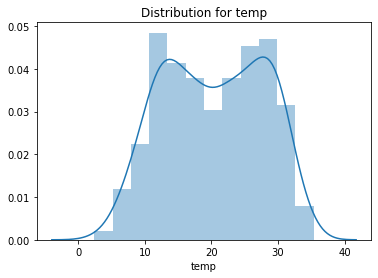

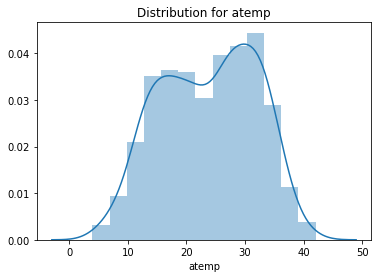

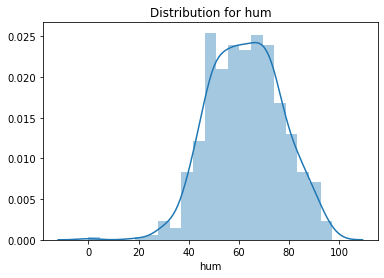

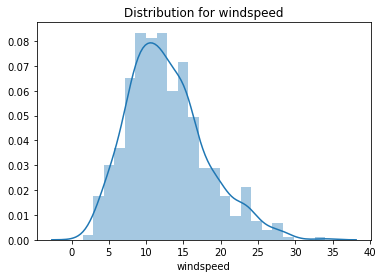

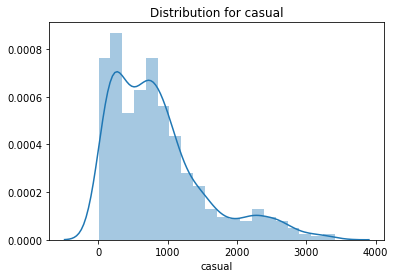

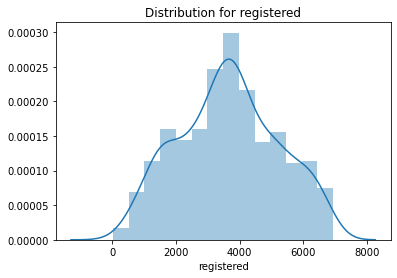

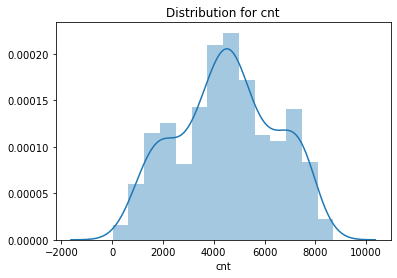

In [39]:
for col in x:
    sns.distplot(df[col])
    plt.title("Distribution for "+ col)
    plt.show()

In [40]:
# Ctaegorical cols
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Spring,2018,Jan,No,Mon,Yes,Mist
1,Spring,2018,Jan,No,Tue,Yes,Mist
2,Spring,2018,Jan,No,Wed,Yes,Clear
3,Spring,2018,Jan,No,Thur,Yes,Clear
4,Spring,2018,Jan,No,Fri,Yes,Clear


In [41]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

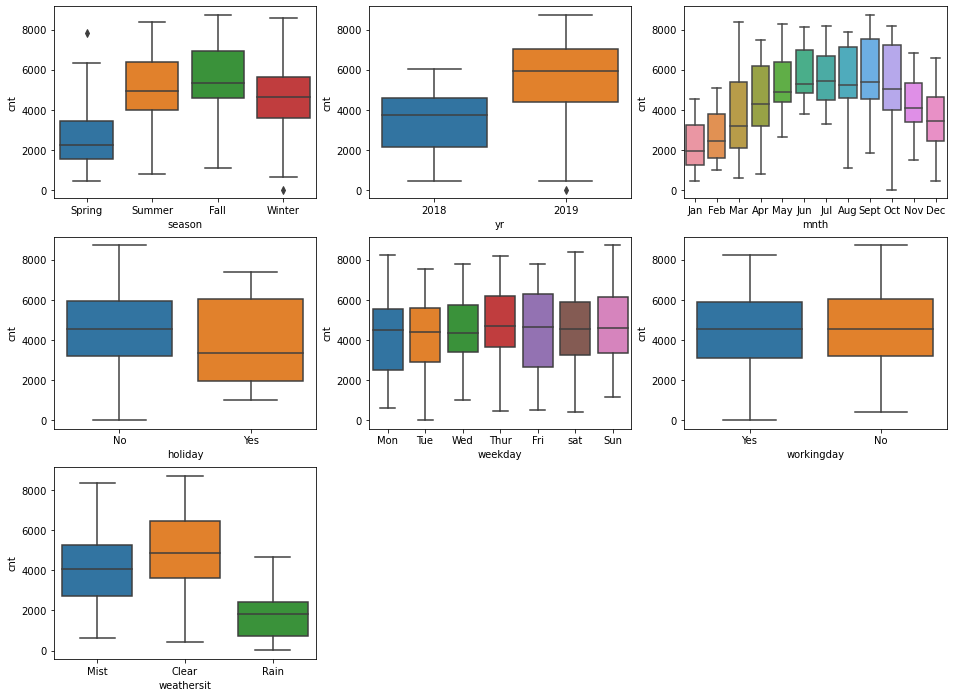

In [42]:
# Visualising the categorical cols
plt.figure(figsize=(16,12))

plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(332)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(333)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(334)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(336)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(337)
sns.boxplot(x='weathersit', y='cnt', data=df)

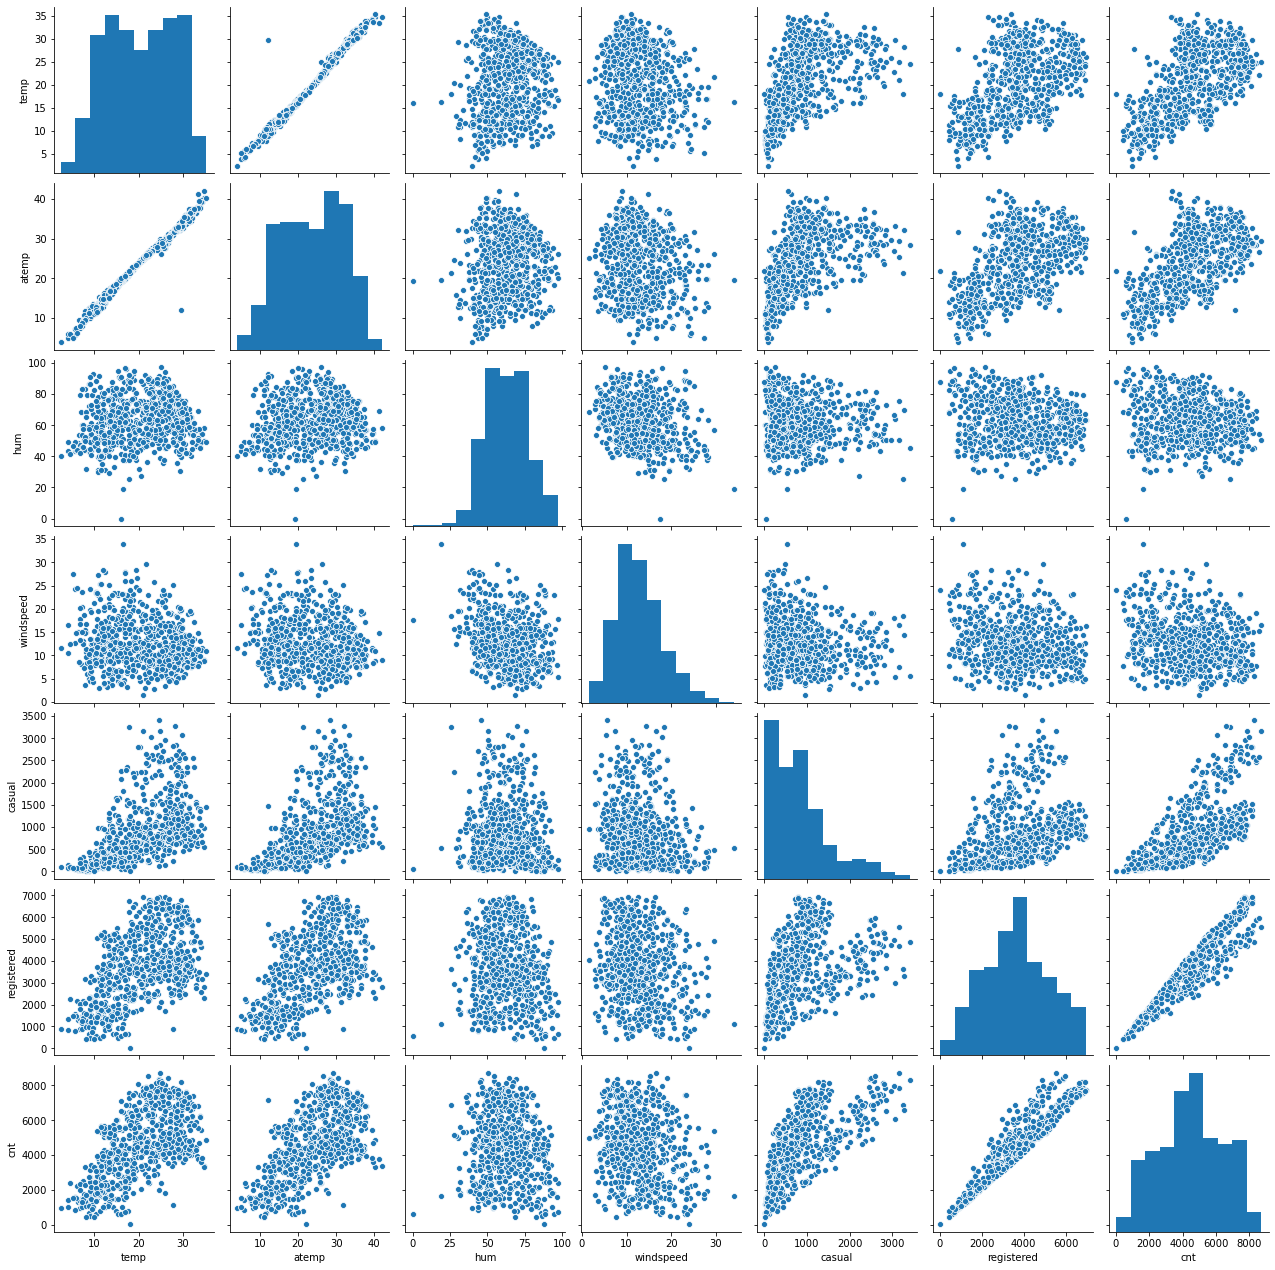

In [43]:
# Analyzing the Numerical Vars
sns.pairplot(df[x])

atemp col and registered col are highly coefficient

In [44]:
df[x].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


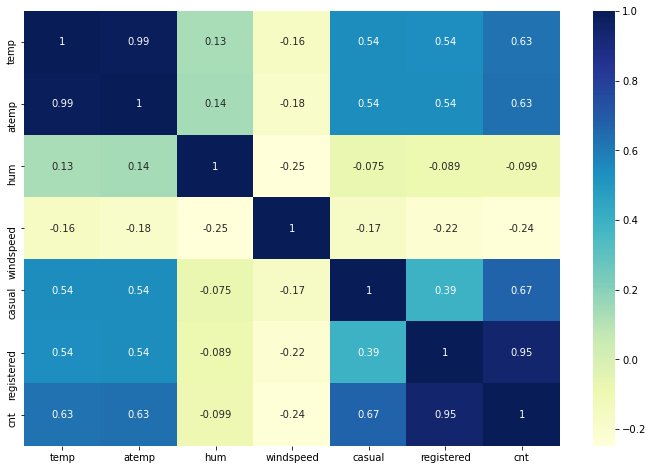

In [45]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[x].corr(), annot=True, cmap='YlGnBu')

In [46]:
df = df.drop('atemp', axis=1)

In [47]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,Jan,No,Mon,Yes,Mist,14.110847,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,2018,Jan,No,Tue,Yes,Mist,14.902598,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,2018,Jan,No,Thur,Yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 80.0+ KB


In [49]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [50]:
df_num.head()

,temp,hum,windspeed,casual,registered,cnt
0,14.110847,80.5833,10.749882,331,654,985
1,14.902598,69.6087,16.652113,131,670,801
2,8.050924,43.7273,16.636703,120,1229,1349
3,8.200000,59.0435,10.739832,108,1454,1562
4,9.305237,43.6957,12.522300,82,1518,1600


In [51]:
x = df_num.columns

In [52]:
x

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [53]:
df[x].corr()

,temp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.128565,-0.158186,0.542731,0.539436,0.627044
hum,0.128565,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,-0.098543,-0.235132,0.672123,0.945411,1.000000


In [54]:
# Cols 'casual' and registerd are of no use
df = df.drop(['casual', 'registered'], axis=1)

In [55]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,Spring,2018,Jan,No,Mon,Yes,Mist,14.110847,80.5833,10.749882,985
1,2018-02-01,Spring,2018,Jan,No,Tue,Yes,Mist,14.902598,69.6087,16.652113,801
2,2018-03-01,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,43.7273,16.636703,1349
3,2018-04-01,Spring,2018,Jan,No,Thur,Yes,Clear,8.200000,59.0435,10.739832,1562
4,2018-05-01,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,43.6957,12.522300,1600


## Step-2: Data Preparation

In [56]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [57]:
# Convert into dummies
df_cat_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [58]:
df_cat_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df = pd.concat([df, df_cat_dummies], axis=1)

In [60]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
0,2018-01-01,Spring,2018,Jan,No,Mon,Yes,Mist,14.110847,80.5833,...,0,1,0,0,0,0,0,1,1,0
1,2018-02-01,Spring,2018,Jan,No,Tue,Yes,Mist,14.902598,69.6087,...,0,0,0,0,1,0,0,1,1,0
2,2018-03-01,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,2018-04-01,Spring,2018,Jan,No,Thur,Yes,Clear,8.200000,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,2018-05-01,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [61]:
df = df.drop(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis=1)

In [62]:
df.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.shape

(730, 29)

## Splitting into train and set

In [64]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)

In [65]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Scaling the Features

In [66]:
scaler = MinMaxScaler()

In [67]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [68]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Step-3: Training the Model

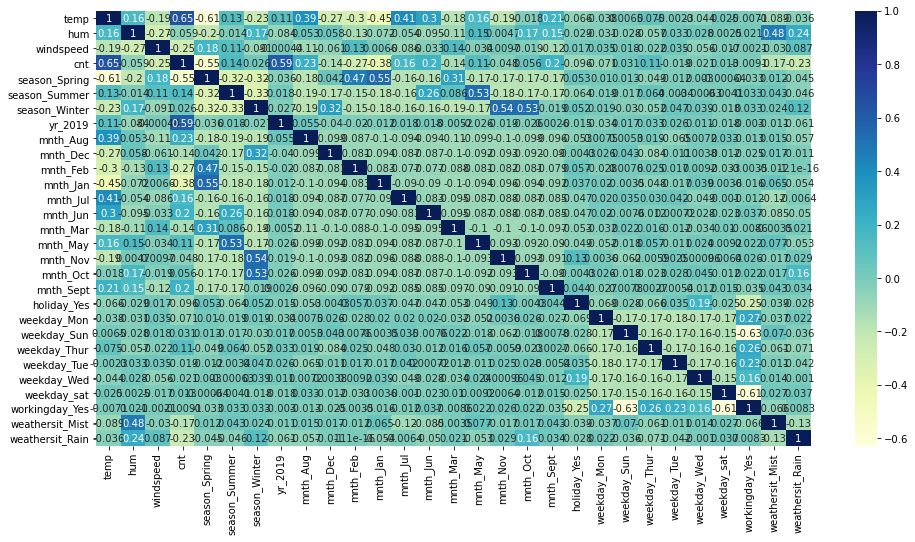

In [70]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

In [71]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [72]:
print(y_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64


In [73]:
# Add a constant
X_train_sm = sm.add_constant(X_train['temp'])
# Create the first model
lr = sm.OLS(y_train, X_train_sm)
# Fit the model
lr_model = lr.fit()
# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.46e-61
Time:                        19:34:17   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Add another variable
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sept', 'holiday_Yes', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weekday_sat',
       'workingday_Yes', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [75]:
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019']])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.34e-130
Time:                        19:34:19   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr_2019        0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding all variables to the model

In [76]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.34e-178
Time:                        19:34:21   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3912      0.085      4.594      0.000       0.224       0.558
temp                0.4405      0.047      9.412      0.000       0.349       0.532
hum                -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed          -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_Spring      -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_Summer       0.0464      0.026      1.761      0.079      -0.005       0.098
season_Winter       0.1126      0.028      3.994      0.000       0.057       0.168
yr_2019             0.2311      0.008     28.384      0.000       0.215       0.247
mnth_Aug            0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec           -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb           -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan           -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_Jul           -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_Jun            0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar            0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May            0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov           -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct            0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sept           0.0908      0.032      2.822      0.005       0.028       0.154
holiday_Yes        -0.1348      0.065     -2.059      0.040      -0.263      -0.006
weekday_Mon        -0.0246      0.015     -1.687      0.092      -0.053       0.004
weekday_Sun        -0.0495      0.072     -0.691      0.490      -0.190       0.091
weekday_Thur        0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_Tue        -0.0261      0.015     -1.774      0.077      -0.055       0.003
weekday_Wed        -0.0102      0.015     -0.669      0.504      -0.040       0.020
weekday_sat        -0.0557      0.072     -0.777      0.437      -0.197       0.085
workingday_Yes     -0.0600      0.071     -0.844      0.399      -0.200       0.080
weathersit_Mist    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
weathersit_Rain    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4


## Checking VIF

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [78]:
vif

,Features,VIF
25,workingday_Yes,63.89
0,temp,43.77
1,hum,41.18
3,season_Spring,13.50
5,season_Winter,12.40
20,weekday_Sun,12.34
24,weekday_sat,11.83
4,season_Summer,9.85
15,mnth_Nov,7.16
16,mnth_Oct,6.82


In [79]:
X_train = X_train.drop('mnth_Mar', axis=1)

In [80]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.32e-179
Time:                        19:34:25   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3917      0.084      4.684      0.000       0.227       0.556
temp                0.4403      0.046      9.550      0.000       0.350       0.531
hum                -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed          -0.1825      0.026     -7.020      0.000      -0.234      -0.131
season_Spring      -0.0401      0.029     -1.401      0.162      -0.096       0.016
season_Summer       0.0463      0.026      1.790      0.074      -0.005       0.097
season_Winter       0.1128      0.028      4.075      0.000       0.058       0.167
yr_2019             0.2311      0.008     28.414      0.000       0.215       0.247
mnth_Aug            0.0269      0.032      0.843      0.399      -0.036       0.090
mnth_Dec           -0.0451      0.026     -1.718      0.086      -0.097       0.006
mnth_Feb           -0.0382      0.022     -1.699      0.090      -0.082       0.006
mnth_Jan           -0.0650      0.023     -2.883      0.004      -0.109      -0.021
mnth_Jul           -0.0288      0.034     -0.858      0.391      -0.095       0.037
mnth_Jun            0.0081      0.024      0.344      0.731      -0.038       0.055
mnth_May            0.0245      0.020      1.233      0.218      -0.015       0.064
mnth_Nov           -0.0402      0.031     -1.293      0.197      -0.101       0.021
mnth_Oct            0.0050      0.031      0.162      0.871      -0.056       0.066
mnth_Sept           0.0904      0.029      3.092      0.002       0.033       0.148
holiday_Yes        -0.1348      0.065     -2.061      0.040      -0.263      -0.006
weekday_Mon        -0.0246      0.015     -1.692      0.091      -0.053       0.004
weekday_Sun        -0.0494      0.072     -0.691      0.490      -0.190       0.091
weekday_Thur        0.0042      0.015      0.283      0.778      -0.025       0.034
weekday_Tue        -0.0261      0.015     -1.778      0.076      -0.055       0.003
weekday_Wed        -0.0102      0.015     -0.671      0.503      -0.040       0.020
weekday_sat        -0.0557      0.072     -0.778      0.437      -0.196       0.085
workingday_Yes     -0.0600      0.071     -0.845      0.399      -0.200       0.080
weathersit_Mist    -0.0579      0.011     -5.502      0.000      -0.079      -0.037
weathersit_Rain    -0.2499      0.027     -9.390      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):                     2.34e-45
Kurtosis:                       5.711   Cond. No.                         70.2
==============================================================================

Warn

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
24,workingday_Yes,57.64
0,temp,43.12
1,hum,40.57
5,season_Winter,11.85
3,season_Spring,11.56
19,weekday_Sun,11.11
23,weekday_sat,10.72
4,season_Summer,9.64
7,mnth_Aug,6.15
2,windspeed,5.59


In [82]:
X_train = X_train.drop('weekday_Thur', axis=1)

In [83]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.32e-180
Time:                        19:34:28   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3937      0.083      4.731      0.000       0.230       0.557
temp                0.4404      0.046      9.562      0.000       0.350       0.531
hum                -0.1576      0.039     -4.073      0.000      -0.234      -0.082
windspeed          -0.1827      0.026     -7.033      0.000      -0.234      -0.132
season_Spring      -0.0402      0.029     -1.407      0.160      -0.096       0.016
season_Summer       0.0465      0.026      1.800      0.073      -0.004       0.097
season_Winter       0.1129      0.028      4.083      0.000       0.059       0.167
yr_2019             0.2312      0.008     28.460      0.000       0.215       0.247
mnth_Aug            0.0270      0.032      0.845      0.399      -0.036       0.090
mnth_Dec           -0.0453      0.026     -1.730      0.084      -0.097       0.006
mnth_Feb           -0.0380      0.022     -1.691      0.091      -0.082       0.006
mnth_Jan           -0.0650      0.023     -2.884      0.004      -0.109      -0.021
mnth_Jul           -0.0286      0.034     -0.852      0.394      -0.095       0.037
mnth_Jun            0.0078      0.024      0.330      0.742      -0.039       0.054
mnth_May            0.0245      0.020      1.233      0.218      -0.015       0.063
mnth_Nov           -0.0403      0.031     -1.298      0.195      -0.101       0.021
mnth_Oct            0.0051      0.031      0.165      0.869      -0.056       0.066
mnth_Sept           0.0904      0.029      3.095      0.002       0.033       0.148
holiday_Yes        -0.1347      0.065     -2.063      0.040      -0.263      -0.006
weekday_Mon        -0.0267      0.013     -2.124      0.034      -0.051      -0.002
weekday_Sun        -0.0513      0.071     -0.721      0.471      -0.191       0.088
weekday_Tue        -0.0282      0.013     -2.231      0.026      -0.053      -0.003
weekday_Wed        -0.0123      0.013     -0.920      0.358      -0.039       0.014
weekday_sat        -0.0576      0.071     -0.808      0.419      -0.198       0.082
workingday_Yes     -0.0598      0.071     -0.843      0.400      -0.199       0.080
weathersit_Mist    -0.0579      0.011     -5.517      0.000      -0.079      -0.037
weathersit_Rain    -0.2506      0.026     -9.467      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       78.346   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.875
Skew:                          -0.764   Prob(JB):                     1.20e-45
Kurtosis:                       5.720   Cond. No.                         69.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
23,workingday_Yes,55.91
0,temp,43.07
1,hum,40.57
5,season_Winter,11.84
3,season_Spring,11.55
19,weekday_Sun,11.10
22,weekday_sat,10.71
4,season_Summer,9.61
7,mnth_Aug,6.15
2,windspeed,5.59


In [85]:
X_train = X_train.drop('mnth_Jun', axis=1)

In [86]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.32e-181
Time:                        19:34:30   Log-Likelihood:                 522.89
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     484   BIC:                            -883.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3942      0.083      4.741      0.000       0.231       0.558
temp                0.4485      0.039     11.510      0.000       0.372       0.525
hum                -0.1590      0.038     -4.137      0.000      -0.235      -0.083
windspeed          -0.1835      0.026     -7.105      0.000      -0.234      -0.133
season_Spring      -0.0431      0.027     -1.588      0.113      -0.096       0.010
season_Summer       0.0444      0.025      1.775      0.077      -0.005       0.093
season_Winter       0.1112      0.027      4.095      0.000       0.058       0.165
yr_2019             0.2309      0.008     28.583      0.000       0.215       0.247
mnth_Aug            0.0205      0.025      0.815      0.415      -0.029       0.070
mnth_Dec           -0.0460      0.026     -1.763      0.079      -0.097       0.005
mnth_Feb           -0.0374      0.022     -1.671      0.095      -0.081       0.007
mnth_Jan           -0.0638      0.022     -2.870      0.004      -0.108      -0.020
mnth_Jul           -0.0356      0.026     -1.372      0.171      -0.087       0.015
mnth_May            0.0214      0.017      1.223      0.222      -0.013       0.056
mnth_Nov           -0.0418      0.031     -1.363      0.174      -0.102       0.018
mnth_Oct            0.0026      0.030      0.087      0.931      -0.056       0.061
mnth_Sept           0.0852      0.025      3.464      0.001       0.037       0.134
holiday_Yes        -0.1346      0.065     -2.062      0.040      -0.263      -0.006
weekday_Mon        -0.0264      0.013     -2.107      0.036      -0.051      -0.002
weekday_Sun        -0.0506      0.071     -0.712      0.477      -0.190       0.089
weekday_Tue        -0.0281      0.013     -2.225      0.027      -0.053      -0.003
weekday_Wed        -0.0122      0.013     -0.911      0.363      -0.038       0.014
weekday_sat        -0.0569      0.071     -0.799      0.425      -0.197       0.083
workingday_Yes     -0.0591      0.071     -0.834      0.405      -0.198       0.080
weathersit_Mist    -0.0578      0.010     -5.513      0.000      -0.078      -0.037
weathersit_Rain    -0.2505      0.026     -9.471      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       77.548   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.735
Skew:                          -0.761   Prob(JB):                     1.56e-44
Kurtosis:                       5.678   Cond. No.                         69.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
22,workingday_Yes,55.46
1,hum,40.09
0,temp,29.79
5,season_Winter,11.45
18,weekday_Sun,11.00
21,weekday_sat,10.63
3,season_Spring,10.37
4,season_Summer,8.99
2,windspeed,5.54
13,mnth_Nov,5.15


In [88]:
X_train = X_train.drop('mnth_Oct', axis=1)

In [89]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.22e-182
Time:                        19:34:33   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3950      0.083      4.786      0.000       0.233       0.557
temp                0.4482      0.039     11.556      0.000       0.372       0.524
hum                -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed          -0.1833      0.026     -7.121      0.000      -0.234      -0.133
season_Spring      -0.0434      0.027     -1.618      0.106      -0.096       0.009
season_Summer       0.0436      0.023      1.859      0.064      -0.002       0.090
season_Winter       0.1125      0.023      4.917      0.000       0.068       0.157
yr_2019             0.2309      0.008     28.619      0.000       0.215       0.247
mnth_Aug            0.0198      0.024      0.830      0.407      -0.027       0.067
mnth_Dec           -0.0476      0.018     -2.595      0.010      -0.084      -0.012
mnth_Feb           -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan           -0.0644      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul           -0.0363      0.025     -1.459      0.145      -0.085       0.013
mnth_May            0.0214      0.017      1.225      0.221      -0.013       0.056
mnth_Nov           -0.0439      0.019     -2.288      0.023      -0.082      -0.006
mnth_Sept           0.0842      0.022      3.896      0.000       0.042       0.127
holiday_Yes        -0.1346      0.065     -2.064      0.040      -0.263      -0.006
weekday_Mon        -0.0263      0.013     -2.107      0.036      -0.051      -0.002
weekday_Sun        -0.0508      0.071     -0.716      0.474      -0.190       0.089
weekday_Tue        -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_Wed        -0.0122      0.013     -0.911      0.363      -0.038       0.014
weekday_sat        -0.0570      0.071     -0.803      0.422      -0.197       0.083
workingday_Yes     -0.0593      0.071     -0.838      0.402      -0.198       0.080
weathersit_Mist    -0.0578      0.010     -5.526      0.000      -0.078      -0.037
weathersit_Rain    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
21,workingday_Yes,54.55
1,hum,39.11
0,temp,29.71
17,weekday_Sun,10.82
20,weekday_sat,10.44
3,season_Spring,10.24
4,season_Summer,8.04
5,season_Winter,7.81
2,windspeed,5.50
7,mnth_Aug,3.44


In [91]:
X_train = X_train.drop('weekday_Sun', axis=1)

In [92]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.42e-183
Time:                        19:34:35   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3436      0.041      8.442      0.000       0.264       0.424
temp                0.4490      0.039     11.588      0.000       0.373       0.525
hum                -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed          -0.1838      0.026     -7.147      0.000      -0.234      -0.133
season_Spring      -0.0431      0.027     -1.608      0.109      -0.096       0.010
season_Summer       0.0437      0.023      1.863      0.063      -0.002       0.090
season_Winter       0.1123      0.023      4.910      0.000       0.067       0.157
yr_2019             0.2313      0.008     28.724      0.000       0.215       0.247
mnth_Aug            0.0194      0.024      0.816      0.415      -0.027       0.066
mnth_Dec           -0.0474      0.018     -2.584      0.010      -0.083      -0.011
mnth_Feb           -0.0375      0.022     -1.736      0.083      -0.080       0.005
mnth_Jan           -0.0641      0.021     -2.995      0.003      -0.106      -0.022
mnth_Jul           -0.0367      0.025     -1.476      0.141      -0.085       0.012
mnth_May            0.0211      0.017      1.209      0.227      -0.013       0.055
mnth_Nov           -0.0451      0.019     -2.364      0.018      -0.083      -0.008
mnth_Sept           0.0843      0.022      3.904      0.000       0.042       0.127
holiday_Yes        -0.0926      0.029     -3.247      0.001      -0.149      -0.037
weekday_Mon        -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Tue        -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wed        -0.0109      0.013     -0.824      0.411      -0.037       0.015
weekday_sat        -0.0074      0.015     -0.483      0.629      -0.037       0.023
workingday_Yes     -0.0095      0.013     -0.732      0.465      -0.035       0.016
weathersit_Mist    -0.0578      0.010     -5.529      0.000      -0.078      -0.037
weathersit_Rain    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,34.32
0,temp,21.83
20,workingday_Yes,7.46
3,season_Spring,7.37
5,season_Winter,5.99
4,season_Summer,5.87
2,windspeed,4.96
7,mnth_Aug,3.14
11,mnth_Jul,2.79
10,mnth_Jan,2.42


In [94]:
X_train = X_train.drop('weekday_sat', axis=1)

In [95]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.41e-184
Time:                        19:34:37   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3403      0.040      8.486      0.000       0.262       0.419
temp                0.4486      0.039     11.590      0.000       0.373       0.525
hum                -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed          -0.1835      0.026     -7.143      0.000      -0.234      -0.133
season_Spring      -0.0436      0.027     -1.626      0.105      -0.096       0.009
season_Summer       0.0434      0.023      1.852      0.065      -0.003       0.089
season_Winter       0.1120      0.023      4.905      0.000       0.067       0.157
yr_2019             0.2314      0.008     28.774      0.000       0.216       0.247
mnth_Aug            0.0191      0.024      0.803      0.422      -0.028       0.066
mnth_Dec           -0.0472      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb           -0.0372      0.022     -1.726      0.085      -0.080       0.005
mnth_Jan           -0.0641      0.021     -2.998      0.003      -0.106      -0.022
mnth_Jul           -0.0367      0.025     -1.477      0.140      -0.085       0.012
mnth_May            0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov           -0.0456      0.019     -2.397      0.017      -0.083      -0.008
mnth_Sept           0.0841      0.022      3.899      0.000       0.042       0.126
holiday_Yes        -0.0895      0.028     -3.223      0.001      -0.144      -0.035
weekday_Mon        -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Tue        -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wed        -0.0108      0.013     -0.819      0.413      -0.037       0.015
workingday_Yes     -0.0059      0.011     -0.556      0.579      -0.027       0.015
weathersit_Mist    -0.0577      0.010     -5.524      0.000      -0.078      -0.037
weathersit_Rain    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,34.11
0,temp,21.39
3,season_Spring,7.17
5,season_Winter,5.89
4,season_Summer,5.74
19,workingday_Yes,5.15
2,windspeed,4.95
7,mnth_Aug,3.12
11,mnth_Jul,2.78
10,mnth_Jan,2.41


In [97]:
X_train = X_train.drop('workingday_Yes', axis=1)

In [98]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.41e-185
Time:                        19:34:40   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3374      0.040      8.492      0.000       0.259       0.415
temp                0.4486      0.039     11.597      0.000       0.373       0.525
hum                -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed          -0.1835      0.026     -7.148      0.000      -0.234      -0.133
season_Spring      -0.0432      0.027     -1.615      0.107      -0.096       0.009
season_Summer       0.0436      0.023      1.861      0.063      -0.002       0.090
season_Winter       0.1124      0.023      4.927      0.000       0.068       0.157
yr_2019             0.2314      0.008     28.798      0.000       0.216       0.247
mnth_Aug            0.0195      0.024      0.821      0.412      -0.027       0.066
mnth_Dec           -0.0470      0.018     -2.569      0.011      -0.083      -0.011
mnth_Feb           -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan           -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul           -0.0360      0.025     -1.453      0.147      -0.085       0.013
mnth_May            0.0209      0.017      1.202      0.230      -0.013       0.055
mnth_Nov           -0.0462      0.019     -2.433      0.015      -0.084      -0.009
mnth_Sept           0.0844      0.022      3.916      0.000       0.042       0.127
holiday_Yes        -0.0841      0.026     -3.237      0.001      -0.135      -0.033
weekday_Mon        -0.0286      0.011     -2.513      0.012      -0.051      -0.006
weekday_Tue        -0.0300      0.012     -2.609      0.009      -0.053      -0.007
weekday_Wed        -0.0136      0.012     -1.107      0.269      -0.038       0.010
weathersit_Mist    -0.0571      0.010     -5.500      0.000      -0.078      -0.037
weathersit_Rain    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,33.65
0,temp,21.17
3,season_Spring,7.14
5,season_Winter,5.88
4,season_Summer,5.70
2,windspeed,4.94
7,mnth_Aug,3.12
11,mnth_Jul,2.78
10,mnth_Jan,2.41
19,weathersit_Mist,2.34


In [100]:
X_train = X_train.drop('mnth_Aug', axis=1)

In [101]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.66e-186
Time:                        19:34:42   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3483      0.037      9.299      0.000       0.275       0.422
temp                0.4510      0.039     11.695      0.000       0.375       0.527
hum                -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed          -0.1837      0.026     -7.157      0.000      -0.234      -0.133
season_Spring      -0.0557      0.022     -2.523      0.012      -0.099      -0.012
season_Summer       0.0304      0.017      1.784      0.075      -0.003       0.064
season_Winter       0.1009      0.018      5.614      0.000       0.066       0.136
yr_2019             0.2316      0.008     28.843      0.000       0.216       0.247
mnth_Dec           -0.0480      0.018     -2.627      0.009      -0.084      -0.012
mnth_Feb           -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan           -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul           -0.0499      0.018     -2.751      0.006      -0.085      -0.014
mnth_May            0.0205      0.017      1.177      0.240      -0.014       0.055
mnth_Nov           -0.0475      0.019     -2.506      0.013      -0.085      -0.010
mnth_Sept           0.0733      0.017      4.371      0.000       0.040       0.106
holiday_Yes        -0.0847      0.026     -3.260      0.001      -0.136      -0.034
weekday_Mon        -0.0283      0.011     -2.489      0.013      -0.051      -0.006
weekday_Tue        -0.0302      0.012     -2.624      0.009      -0.053      -0.008
weekday_Wed        -0.0133      0.012     -1.090      0.276      -0.037       0.011
weathersit_Mist    -0.0568      0.010     -5.474      0.000      -0.077      -0.036
weathersit_Rain    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,32.04
0,temp,18.41
3,season_Spring,5.45
2,windspeed,4.87
5,season_Winter,4.10
4,season_Summer,3.35
9,mnth_Jan,2.38
18,weathersit_Mist,2.34
6,yr_2019,2.11
8,mnth_Feb,1.92


In [103]:
X_train = X_train.drop('weekday_Wed', axis=1)

In [104]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.45e-187
Time:                        19:35:59   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3449      0.037      9.238      0.000       0.272       0.418
temp                0.4530      0.039     11.758      0.000       0.377       0.529
hum                -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed          -0.1827      0.026     -7.120      0.000      -0.233      -0.132
season_Spring      -0.0548      0.022     -2.484      0.013      -0.098      -0.011
season_Summer       0.0307      0.017      1.800      0.072      -0.003       0.064
season_Winter       0.1004      0.018      5.589      0.000       0.065       0.136
yr_2019             0.2314      0.008     28.820      0.000       0.216       0.247
mnth_Dec           -0.0472      0.018     -2.588      0.010      -0.083      -0.011
mnth_Feb           -0.0377      0.022     -1.749      0.081      -0.080       0.005
mnth_Jan           -0.0646      0.021     -3.021      0.003      -0.107      -0.023
mnth_Jul           -0.0497      0.018     -2.741      0.006      -0.085      -0.014
mnth_May            0.0201      0.017      1.153      0.249      -0.014       0.054
mnth_Nov           -0.0461      0.019     -2.442      0.015      -0.083      -0.009
mnth_Sept           0.0739      0.017      4.412      0.000       0.041       0.107
holiday_Yes        -0.0902      0.025     -3.540      0.000      -0.140      -0.040
weekday_Mon        -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_Tue        -0.0275      0.011     -2.446      0.015      -0.050      -0.005
weathersit_Mist    -0.0566      0.010     -5.454      0.000      -0.077      -0.036
weathersit_Rain    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,31.84
0,temp,18.41
3,season_Spring,5.45
2,windspeed,4.87
5,season_Winter,4.08
4,season_Summer,3.35
9,mnth_Jan,2.38
17,weathersit_Mist,2.34
6,yr_2019,2.11
8,mnth_Feb,1.92


In [106]:
X_train = X_train.drop('mnth_May', axis=1)

In [107]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.77e-188
Time:                        19:37:04   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3360      0.037      9.195      0.000       0.264       0.408
temp                0.4607      0.038     12.142      0.000       0.386       0.535
hum                -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed          -0.1841      0.026     -7.182      0.000      -0.234      -0.134
season_Spring      -0.0515      0.022     -2.353      0.019      -0.094      -0.008
season_Summer       0.0393      0.015      2.562      0.011       0.009       0.069
season_Winter       0.1022      0.018      5.711      0.000       0.067       0.137
yr_2019             0.2309      0.008     28.790      0.000       0.215       0.247
mnth_Dec           -0.0461      0.018     -2.527      0.012      -0.082      -0.010
mnth_Feb           -0.0365      0.022     -1.694      0.091      -0.079       0.006
mnth_Jan           -0.0631      0.021     -2.957      0.003      -0.105      -0.021
mnth_Jul           -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Nov           -0.0447      0.019     -2.369      0.018      -0.082      -0.008
mnth_Sept           0.0739      0.017      4.410      0.000       0.041       0.107
holiday_Yes        -0.0909      0.025     -3.570      0.000      -0.141      -0.041
weekday_Mon        -0.0264      0.011     -2.367      0.018      -0.048      -0.004
weekday_Tue        -0.0278      0.011     -2.477      0.014      -0.050      -0.006
weathersit_Mist    -0.0568      0.010     -5.471      0.000      -0.077      -0.036
weathersit_Rain    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,31.80
0,temp,18.36
3,season_Spring,5.45
2,windspeed,4.78
5,season_Winter,4.08
4,season_Summer,2.82
9,mnth_Jan,2.38
16,weathersit_Mist,2.34
6,yr_2019,2.10
8,mnth_Feb,1.92


In [109]:
X_train = X_train.drop('mnth_Feb', axis=1)

In [110]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.21e-188
Time:                        19:38:23   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3239      0.036      9.021      0.000       0.253       0.394
temp                0.4771      0.037     12.975      0.000       0.405       0.549
hum                -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed          -0.1829      0.026     -7.124      0.000      -0.233      -0.132
season_Spring      -0.0615      0.021     -2.912      0.004      -0.103      -0.020
season_Summer       0.0427      0.015      2.803      0.005       0.013       0.073
season_Winter       0.1040      0.018      5.810      0.000       0.069       0.139
yr_2019             0.2305      0.008     28.700      0.000       0.215       0.246
mnth_Dec           -0.0366      0.017     -2.107      0.036      -0.071      -0.002
mnth_Jan           -0.0436      0.018     -2.421      0.016      -0.079      -0.008
mnth_Jul           -0.0510      0.018     -2.812      0.005      -0.087      -0.015
mnth_Nov           -0.0397      0.019     -2.128      0.034      -0.076      -0.003
mnth_Sept           0.0755      0.017      4.502      0.000       0.043       0.108
holiday_Yes        -0.0933      0.025     -3.662      0.000      -0.143      -0.043
weekday_Mon        -0.0258      0.011     -2.309      0.021      -0.048      -0.004
weekday_Tue        -0.0280      0.011     -2.487      0.013      -0.050      -0.006
weathersit_Mist    -0.0565      0.010     -5.432      0.000      -0.077      -0.036
weathersit_Rain    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,31.17
0,temp,17.82
2,windspeed,4.77
3,season_Spring,4.37
5,season_Winter,4.08
4,season_Summer,2.82
15,weathersit_Mist,2.33
6,yr_2019,2.09
10,mnth_Nov,1.85
8,mnth_Jan,1.75


In [115]:
X_tarin = X_train.drop('hum', axis=1)

In [116]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.21e-188
Time:                        19:40:26   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3239      0.036      9.021      0.000       0.253       0.394
temp                0.4771      0.037     12.975      0.000       0.405       0.549
hum                -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed          -0.1829      0.026     -7.124      0.000      -0.233      -0.132
season_Spring      -0.0615      0.021     -2.912      0.004      -0.103      -0.020
season_Summer       0.0427      0.015      2.803      0.005       0.013       0.073
season_Winter       0.1040      0.018      5.810      0.000       0.069       0.139
yr_2019             0.2305      0.008     28.700      0.000       0.215       0.246
mnth_Dec           -0.0366      0.017     -2.107      0.036      -0.071      -0.002
mnth_Jan           -0.0436      0.018     -2.421      0.016      -0.079      -0.008
mnth_Jul           -0.0510      0.018     -2.812      0.005      -0.087      -0.015
mnth_Nov           -0.0397      0.019     -2.128      0.034      -0.076      -0.003
mnth_Sept           0.0755      0.017      4.502      0.000       0.043       0.108
holiday_Yes        -0.0933      0.025     -3.662      0.000      -0.143      -0.043
weekday_Mon        -0.0258      0.011     -2.309      0.021      -0.048      -0.004
weekday_Tue        -0.0280      0.011     -2.487      0.013      -0.050      -0.006
weathersit_Mist    -0.0565      0.010     -5.432      0.000      -0.077      -0.036
weathersit_Rain    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,hum,31.17
0,temp,17.82
2,windspeed,4.77
3,season_Spring,4.37
5,season_Winter,4.08
4,season_Summer,2.82
15,weathersit_Mist,2.33
6,yr_2019,2.09
10,mnth_Nov,1.85
8,mnth_Jan,1.75


## Step-4: Residual Analysis

In [118]:
y_train_pred = lr_model.predict(X_train_sm)

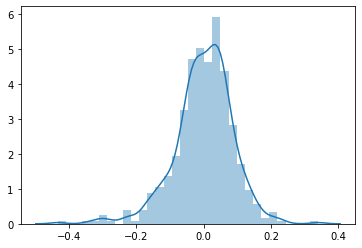

In [119]:
res = y_train - y_train_pred
sns.distplot(res)

## Predictions and Evaluation on the test set

In [120]:
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [121]:
# Create list of numeric vars
df.select_dtypes(include=['int64', 'float64']).columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [122]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [123]:
y_test = df_test.pop('cnt')
X_test = df_test

In [124]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [125]:
X_test_sm.head()

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weekday_sat,workingday_Yes,weathersit_Mist,weathersit_Rain
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
535,1.0,0.901354,0.610133,0.153728,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0.511964,0.837699,0.334206,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0.817246,0.314298,0.537414,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [126]:
X_test_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sept', 'holiday_Yes', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weekday_sat',
       'workingday_Yes', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [128]:
X_test_sm = X_test_sm.drop(['mnth_Mar', 'weekday_Thur', 'mnth_Jun', 'mnth_Oct', 'weekday_Sun', 'weekday_sat', 
                           'workingday_Yes', 'mnth_Aug', 'weekday_Wed', 'mnth_May', 'mnth_Feb'], axis=1)

In [129]:
# Predict
y_test_pred = lr_model.predict(X_test_sm)

In [131]:
# Evaluate the model (i.e. to evaluate the R-Squared)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8259605926429406